## Question 1

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Load the dataset and have a look at it
diabetes = pd.read_csv('../Data/diabetes.csv')

In [3]:
y = diabetes["Outcome"]
X = diabetes.drop("Outcome", axis=1)
print(diabetes.shape, X.shape, y.shape)

(768, 9) (768, 8) (768,)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
p = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
p.fit(X_train, y_train)
print(p.score(X_test, y_test))


0.7552083333333334


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = p.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC : ", roc_auc_score(y_test, y_pred))

Accuracy: 0.7552083333333334
Precision: 0.6851851851851852
Recall: 0.5522388059701493
F1: 0.6115702479338843
AUC :  0.7081194029850746


In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['No Diabetes', 'Diabetes']))

              precision    recall  f1-score   support

 No Diabetes       0.78      0.86      0.82       125
    Diabetes       0.69      0.55      0.61        67

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



### if we are face with imbalanced datasets, we can use the Imbalanced Learn Package 

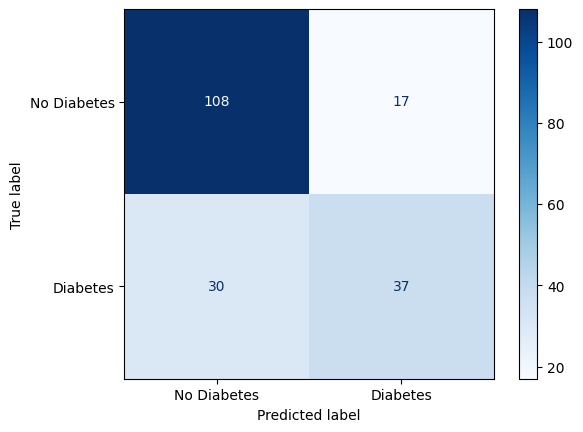

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['No Diabetes', 'Diabetes'], cmap=plt.cm.Blues)
plt.show()

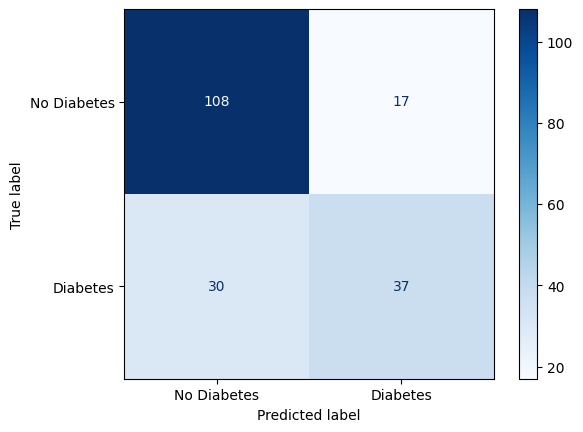

In [8]:
ConfusionMatrixDisplay.from_estimator(p, X_test, y_test, display_labels=['No Diabetes', 'Diabetes'], cmap=plt.cm.Blues)
plt.show()

In [9]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(p, X_test, y_test, name='7-NN')
plt.show()

TypeError: RocCurveDisplay.from_predictions() takes 3 positional arguments but 4 positional arguments (and 1 keyword-only argument) were given

In [12]:
# if we want to know the points and thresholds on the curve
from sklearn.metrics import roc_curve
probas = p.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
df = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresholds})
df 

,FPR,TPR,Thresholds
0,0.000,0.000000,inf
1,0.008,0.104478,1.0
2,0.048,0.313433,0.8
3,0.136,0.552239,0.6
4,0.256,0.716418,0.4
5,0.544,0.895522,0.2
6,1.000,1.000000,0.0


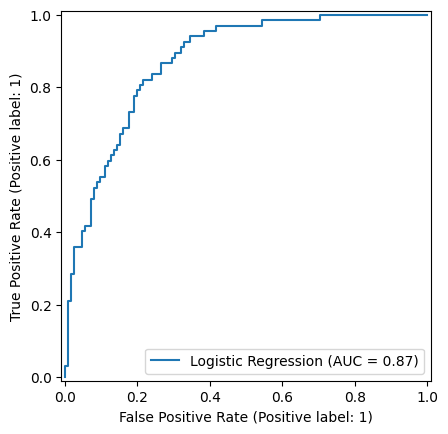

In [16]:
# part 6 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pRL = make_pipeline(StandardScaler(), LogisticRegression())
pRL.fit(X_train, y_train)
RocCurveDisplay.from_estimator(pRL, X_test, y_test, name='Logistic Regression')
plt.show()

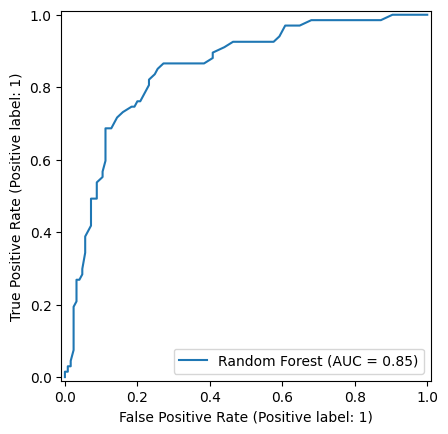

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)
RocCurveDisplay.from_estimator(rf, X_test, y_test, name='Random Forest')
plt.show()

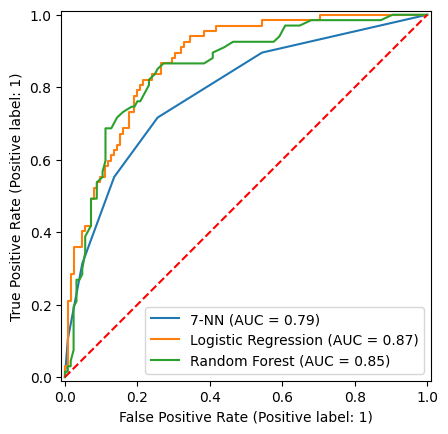

In [18]:
fig,axis = plt.subplots()
RocCurveDisplay.from_estimator(p, X_test, y_test, name='7-NN', ax=axis)
RocCurveDisplay.from_estimator(pRL, X_test, y_test, name='Logistic Regression', ax=axis)
RocCurveDisplay.from_estimator(rf, X_test, y_test, name='Random Forest', ax=axis)
plt.plot([0, 1], [0, 1], linestyle='--', color="r")